<a href="https://colab.research.google.com/github/nchebet09/Naomi-s-Week-6-IP/blob/master/Naomi's_Week_6_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Documentation

### a.) Defining the question 

Include team rankings to determine the prediction result of a game between team 1 and team 2, based on who's home and who's away, and whether or not the game is friendly.

### b.) The metric for success

Being able to create a model that can:

1. Predict the number of goals the home team scores
2. Predict the number of goals the away team scores

### c.) Understanding the context

You've been recruited as a football analyst in Mchezopesa Ltd Company to create a model that predicts the results between team 1 and team 2. The prediction has to capture who is home and away, the team rankings and whether the game is friendly or not.

Two datasets have been provided:
1. Fifa dataset which has 57,793 records and 16 columns. Some of the columns include: team rank, country, rank change, total points and rank date.

2. Results dataset which has 40,839 records and 9 columns. Some of the columns include: date of the match, home and away teams, tournament, home and away scores and whether the game was played at a neutral court or not

### d.) Experimental design

We will start of with:

Loading the data and initial data exploration

Followed by:

Validate the data from external source

Clean the data

Merge the datasets

EDA (Plotting Univariate and Bivariate summaries)

KFold Cross-validation and RMSE computation

Polynomial regression

Feature Engineering and Logistic regression

Creating residual plots for our models and assessing their heteroscedasticity using Bartlett's test

Checking for multicollinearity




### e.) Data Relevance

Yes, we had relevant data to help us solve the problem at hand

##  Reading and Initial Data Exploration

In [1]:
# importing our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore') # the code is used to suppress various deprecation warnings from plotnine run


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Fifa ranking dataset

In [2]:
# loading the datasets

fifa = pd.read_csv('fifa_ranking.csv')

In [3]:
# previewing the head of our dataset

fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [4]:
# previewing the tail of our dataset

fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [5]:
# checking columns of our dataset

fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [6]:
# checking for the shape of fifa dataset

fifa.shape

# fifa dataset has 57,793 records and 16 columns

(57793, 16)

In [7]:
# checking for data types for each column in our dataset

fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [8]:
# checking for any null values in our dataset and also checking for any null values in each column

# print(fifa.isnull().any())
print(fifa.isnull().values.any())
print(fifa.isnull().sum())

# Our dataset has no missing values

False
rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64


In [9]:
# checking for unique values in all the columns

fifa.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [10]:
fifa['rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 147, 168, 169,
       170, 171, 172, 173, 174, 176, 175, 177, 178, 179, 180, 18

In [11]:
fifa['country_full'].unique()

array(['Germany', 'Italy', 'Switzerland', 'Sweden', 'Argentina',
       'Republic of Ireland', 'Russia', 'Brazil', 'Norway', 'Denmark',
       'England', 'France', 'Spain', 'Mexico', 'RCS', 'Netherlands',
       'Nigeria', 'Belgium', 'Colombia', 'Poland', 'Romania', 'Uruguay',
       'Portugal', 'Cameroon', 'Zambia', 'Egypt', 'Wales', 'USA',
       "Côte d'Ivoire", 'Scotland', 'Tunisia', 'Greece', 'Morocco',
       'Algeria', 'Ecuador', 'Korea Republic', 'Bulgaria', 'Austria',
       'Costa Rica', 'Northern Ireland', 'Honduras', 'Hungary', 'Japan',
       'Saudi Arabia', 'China PR', 'Canada', 'Finland', 'Ghana', 'Chile',
       'Zimbabwe', 'Qatar', 'Australia', 'Iceland', 'IR Iran',
       'United Arab Emirates', 'Yugoslavia', 'Iraq', 'Senegal', 'Bolivia',
       'Kuwait', 'Korea DPR', 'El Salvador', 'Turkey', 'Gabon', 'Guinea',
       'Thailand', 'Paraguay', 'Malawi', 'Israel', 'Peru', 'Zaire',
       'Cyprus', 'Singapore', 'Mali', 'Malaysia', 'Bermuda', 'Niger',
       'Syria', 'Bahr

In [12]:
fifa['rank_change'].unique()

array([  0,   9,   5,   1,  -5,  -1,  -6,   7,   2,  11,   3,  -9,  -4,
        16, -10,  10,  -2,  -7,   8,  30,  13, -11,  23,   4,  -3, -27,
        25,  28, -12, -21, -15, -18,  18, -16, -23,  31,  19,  21,  46,
       -17,  53,  15, -29, -13, -20,  14, -24, -14,  -8,   6,  12,  29,
        38,  33,  92,  17,  22,  27,  26,  24,  20,  40,  37,  36,  32,
       -28,  41, -30, -34, -46, -41, -38, -40, -37, -72, -26, -25,  49,
        42,  47,  72,  34, -19, -43, -31,  39, -22,  65, -32, -47, -36,
        59,  35, -33, -42, -39,  55,  44,  52, -35,  48,  51,  58,  57,
        43,  50,  45, -45, -50,  54,  60, -53,  71,  77,  69,  73,  82,
       -44, -52, -49, -62])

In [13]:
fifa['confederation'].unique()

array(['UEFA', 'CONMEBOL', 'CONCACAF', 'CAF', 'AFC', 'OFC'], dtype=object)

In [14]:
fifa['rank_date'].unique()

array(['1993-08-08', '1993-09-23', '1993-10-22', '1993-11-19',
       '1993-12-23', '1994-02-15', '1994-03-15', '1994-04-19',
       '1994-05-17', '1994-06-14', '1994-07-21', '1994-09-13',
       '1994-10-25', '1994-11-22', '1994-12-20', '1995-02-20',
       '1995-04-19', '1995-05-16', '1995-06-13', '1995-07-25',
       '1995-08-22', '1995-09-19', '1995-10-17', '1995-11-21',
       '1995-12-19', '1996-01-24', '1996-02-21', '1996-04-24',
       '1996-05-22', '1996-07-03', '1996-08-28', '1996-09-25',
       '1996-10-23', '1996-11-20', '1996-12-18', '1997-02-27',
       '1997-04-09', '1997-05-14', '1997-06-18', '1997-07-16',
       '1997-08-20', '1997-09-17', '1997-10-17', '1997-11-19',
       '1997-12-23', '1998-02-18', '1998-03-18', '1998-04-22',
       '1998-05-20', '1998-07-15', '1998-08-19', '1998-09-16',
       '1998-10-21', '1998-11-18', '1998-12-23', '1999-01-27',
       '1999-02-24', '1999-03-24', '1999-04-21', '1999-05-19',
       '1999-06-16', '1999-07-21', '1999-08-18', '1999-

### Results dataset

In [15]:
# loading the other dataset

results = pd.read_csv('results.csv')

In [16]:
# loading the head our dataset

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [17]:
# loading the tail of our dataset

results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [18]:
# checking the columns of our dataset

results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [19]:
# checking for shape

results.shape

# results dataset has 40,839 records and 9 columns

(40839, 9)

In [20]:
# checking for data types

results.dtypes

# results dataset had correct data types

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [21]:
# checking for null values

# print(results.isnull().any())
print(results.isnull().values.any())
print(results.isnull().sum())

# there are no missing values in results dataset

False
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


In [22]:
# checking for unique values in all the columns

results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

In [23]:
# exploring a few columns to check for unique values
results['country'].unique()

array(['Scotland', 'England', 'Wales', 'Republic of Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Netherlands', 'Bohemia', 'Switzerland',
       'Sweden', 'Germany', 'Italy', 'Chile', 'Norway', 'Finland',
       'Luxembourg', 'Russia', 'Denmark', 'Spain', 'Japan', 'Brazil',
       'Paraguay', 'China PR', 'Canada', 'Estonia', 'Guatemala',
       'Czechoslovakia', 'Poland', 'Yugoslavia', 'New Zealand', 'Romania',
       'Latvia', 'Portugal', 'Northern Ireland', 'Australia', 'Lithuania',
       'Turkey', 'Mexico', 'Aruba', 'Soviet Union', 'Haiti',
       'Philippines', 'Bulgaria', 'Jamaica', 'Kenya', 'Czech Republic',
       'Peru', 'Honduras', 'British Guyana', 'Uganda', 'El Salvador',
       'Barbados', 'Irish Free State', 'Trinidad and Tobago', 'Greece',
       'Curaçao', 'Egypt', 'Dominica', 'Guadeloupe', 'Palestine',
       'Netherlands Guyana', 'French Guiana', 'Cuba', 'Colombia',
       'Saint Kitts and Nevis', 'Éire', 

In [24]:
results['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

## External Data Validation

To cross check the fifa rankings dataset, I used the fifa world ranking website below:

https://www.fifa.com/fifa-world-ranking/ranking-table/men/rank/id2/

In the website I entered 08 August 1993 to see the rankings, the rankings in the website matched our dataset

## Data Cleaning

### Validity

In [25]:
# dropping unnecessary columns. we have been asked to include rank in our training. 
# looking at the fifa dataset, we have columns that we will not need in our analysis, lets drop those columns

fifa.drop('country_abrv', axis=1, inplace=True) # since we already have the country full name, country abrv is not necessary
fifa.drop(fifa.iloc[:, 5:14], axis =1, inplace=True) # we will drop the average and average weighted points
fifa.head() #preview the head after dropping unnecessary columns

,rank,country_full,total_points,previous_points,rank_change,rank_date
0,1,Germany,0.0,57,0,1993-08-08
1,2,Italy,0.0,57,0,1993-08-08
2,3,Switzerland,0.0,50,9,1993-08-08
3,4,Sweden,0.0,55,0,1993-08-08
4,5,Argentina,0.0,51,5,1993-08-08


In [26]:
# dropping unnecessary columns on results dataframe

results = results.drop(['city'], axis=1)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [27]:

fifa.rename({'country_full': 'country'}, axis =1, inplace=True) # renaming country_full in fifa to country
print(fifa.head(2))
results.rename({'date': 'dateofmatch'}, axis =1, inplace=True) # renaming date to date of match in results dataset
                                                            # to add context to it so that it's not just a regular da
print(results.head(2))

# Great! the two columns have been renamed correctly

   rank  country  total_points  previous_points  rank_change   rank_date
0     1  Germany           0.0               57            0  1993-08-08
1     2    Italy           0.0               57            0  1993-08-08
  dateofmatch home_team away_team  ...  tournament   country neutral
0  1872-11-30  Scotland   England  ...    Friendly  Scotland   False
1  1873-03-08   England  Scotland  ...    Friendly   England   False

[2 rows x 8 columns]


### Completeness

In [28]:
# checking for missing values in both datasets

print(fifa.isnull().values.any())
print(results.isnull().values.any())

# We have no missing value in both datasets

False
False


### Consistency

In [29]:
# checking for duplicated values

print(fifa.duplicated().values.any())
print(fifa.duplicated().sum())
print(results.duplicated().values.any())
print(results.duplicated().sum())

# fifa has some duplicated values, let's explore the records further. there are no duplicated values in results dataset
fifa_duplicated = fifa[fifa.duplicated()]
# checking for the shape of the duplicated records
print(fifa_duplicated.shape)
fifa_duplicated.head(5)

# there is a total of 37 duplicated records
# after further inspection on the duplicated values,
# we see that it's only the country column that is duplicated, the rest of the values in the records are different
# we wont be dropping these values as there is no legit reason to.

True
37
False
0
(37, 6)


,rank,country,total_points,previous_points,rank_change,rank_date
41320,113,Sudan,297.13,304,-1,2011-12-21
41536,120,Sudan,264.81,297,-7,2012-01-18
41736,111,Sudan,301.67,265,9,2012-02-15
41944,110,Sudan,299.75,302,1,2012-03-07
42157,113,Sudan,292.03,300,-3,2012-04-11


### Uniformity

In [30]:
# from earlier dataset explorations, we saw that both fifa and results datasets had
# rank date and date as objects, let's convert that to date time frame

fifa['rank_date'] = pd.to_datetime(fifa['rank_date'])
print(fifa.dtypes)

results['dateofmatch'] = pd.to_datetime(results['dateofmatch'])
print(results.dtypes)

# both datasets have the correct data types now

rank                        int64
country                    object
total_points              float64
previous_points             int64
rank_change                 int64
rank_date          datetime64[ns]
dtype: object
dateofmatch    datetime64[ns]
home_team              object
away_team              object
home_score              int64
away_score              int64
tournament             object
country                object
neutral                  bool
dtype: object


In [31]:
# extracting year from date column in fifa dataframe

# fifa['rank_year'] = pd.DatetimeIndex(fifa['rank_date']).year
# fifa.head()

In [32]:
# dropping the rank date column because we dont need it anymore
# fifa= fifa.drop(['rank_date'], axis=1)
# fifa.head()

In [33]:
# extracting year from date column in results dataset

# results['yearofMatch'] = pd.DatetimeIndex(results['date']).year
# results.head()

In [34]:
# dropping the date column because we dont need it anymore

# results = results.drop(['date'], axis=1)
# results.head()

### Outliers

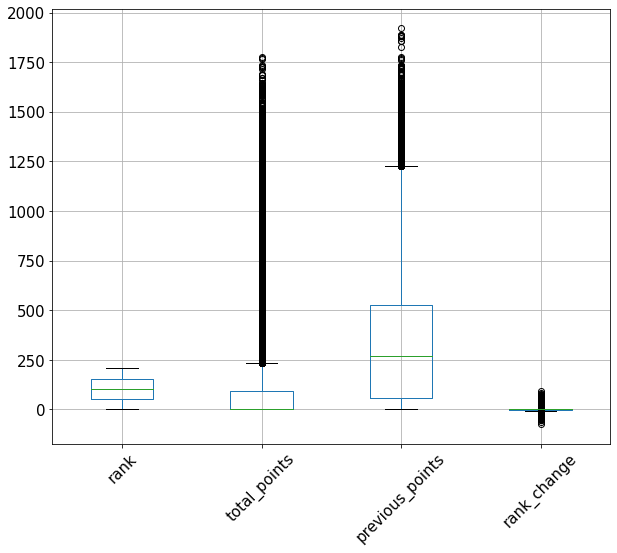

In [35]:
# plotting boxplot for numerical variable (rank) in fifa dataframe to check for any outliers

boxplot = fifa.boxplot(column=['rank', 'total_points', 'previous_points', 'rank_change'],
                       grid=True, rot=45, fontsize=15, figsize=(10, 8))

# We have a clean boxplot of rank column showing no outliers for this column
# total points column has a bunch og outliers but we wont be dropping any of them
# because it's possible that a country would have more than 250 and up to 1750 points throughout the years
# We also have some outliers on the previous points column and we wont be dropping those as well as there is no
# legit reason to, it is part our data
# the rank change column has a lot of outliers that dont make sense to drop so we will keep the column as it is

In [36]:
results.head()

,dateofmatch,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


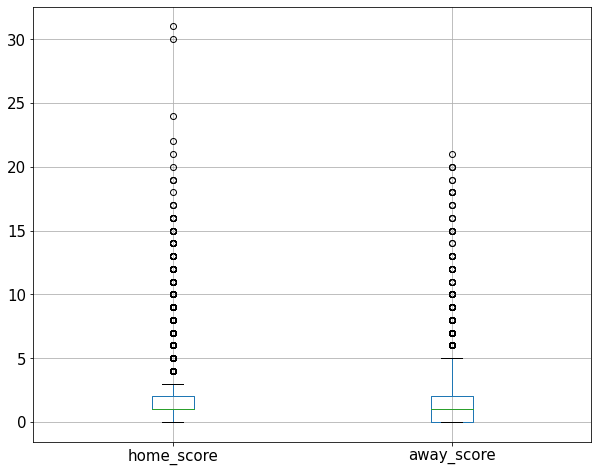

In [37]:
# checking for outliers in results dataframe
boxplot = results.boxplot(column=['home_score', 'away_score'], grid=True, rot=0, fontsize=15, figsize=(10,8))

We see a bunch of outliers in home_score and away_score columns. We wont be dropping this records because it's possible for a team to score more than 3 goals at home and more than 5 goals away

In [38]:
fifa.head(1)

,rank,country,total_points,previous_points,rank_change,rank_date
0,1,Germany,0.0,57,0,1993-08-08


In [39]:
results.head()

,dateofmatch,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


### Merging the datasets

In [40]:
fifa['rank_year_month'] = pd.to_datetime(fifa['rank_date']).dt.to_period('M') # extracting month and year from the rank date column
fifa.drop('rank_date', axis=1, inplace=True) #dropping the rank_date column
fifa.head()

,rank,country,total_points,previous_points,rank_change,rank_year_month
0,1,Germany,0.0,57,0,1993-08
1,2,Italy,0.0,57,0,1993-08
2,3,Switzerland,0.0,50,9,1993-08
3,4,Sweden,0.0,55,0,1993-08
4,5,Argentina,0.0,51,5,1993-08


In [41]:
results['yr&monthofmatch'] = pd.to_datetime(results['dateofmatch']).dt.to_period('M') # extracting month and year from dateofmatch column
results.drop('dateofmatch', axis=1, inplace=True) # dropping the dateofmatch column
results.head(3)

,home_team,away_team,home_score,away_score,tournament,country,neutral,yr&monthofmatch
0,Scotland,England,0,0,Friendly,Scotland,False,1872-11
1,England,Scotland,4,2,Friendly,England,False,1873-03
2,Scotland,England,2,1,Friendly,Scotland,False,1874-03


In [42]:
# merging the two dataframes

merged = results.merge(fifa, how = 'inner', left_on = ['yr&monthofmatch', 'home_team'], 
                      right_on=['rank_year_month', 'country'])
final_merge = merged.merge(fifa, how = 'inner', left_on = ['yr&monthofmatch', 'away_team'],
                      right_on=['rank_year_month', 'country'], suffixes=('_home', '_away'))
print(final_merge.shape)
final_merge.head()

(16957, 20)


,home_team,away_team,home_score,away_score,tournament,country_x,neutral,yr&monthofmatch,rank_home,country_y,total_points_home,previous_points_home,rank_change_home,rank_year_month_home,rank_away,country,total_points_away,previous_points_away,rank_change_away,rank_year_month_away
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993-08,19,Colombia,0.0,36,16,1993-08,67,Paraguay,0.0,22,1,1993-08
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993-08,5,Argentina,0.0,51,5,1993-08,67,Paraguay,0.0,22,1,1993-08
2,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,False,1993-08,19,Colombia,0.0,36,16,1993-08,5,Argentina,0.0,51,5,1993-08
3,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993-08,70,Peru,0.0,16,8,1993-08,5,Argentina,0.0,51,5,1993-08
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False,1993-08,67,Paraguay,0.0,22,1,1993-08,5,Argentina,0.0,51,5,1993-08


In [43]:
# during merging unnecessary columns were created, let's get rid of those
final_merge.drop(['country_x', 'country_y','previous_points_home', 'rank_year_month_home','country',
                  'previous_points_away', 'yr&monthofmatch'], axis = 1, inplace=True)
final_merge.head()


,home_team,away_team,home_score,away_score,tournament,neutral,rank_home,total_points_home,rank_change_home,rank_away,total_points_away,rank_change_away,rank_year_month_away
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,19,0.0,16,67,0.0,1,1993-08
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,5,0.0,5,67,0.0,1,1993-08
2,Colombia,Argentina,2,1,FIFA World Cup qualification,False,19,0.0,16,5,0.0,5,1993-08
3,Peru,Argentina,0,1,FIFA World Cup qualification,False,70,0.0,8,5,0.0,5,1993-08
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,67,0.0,1,5,0.0,5,1993-08


In [44]:
# our final dataframe looks great, let's rename some columns for them to make more sense

final_merge.rename({'home_score': 'home_team_score', 'away_score':'away_team_score','rank_home': 'rank_home_team', 'total_points_home':'points_home_team',
                    'rank_change_home': 'rank_change_home_team', 'rank_away': 'rank_away_team','total_points_away': 'points_away_team',
                    'rank_change_away': 'rank_change_away_team', 'rank_year_month_away':'year_month'}, axis=1, inplace=True)
final_merge.head(1)

,home_team,away_team,home_team_score,away_team_score,tournament,neutral,rank_home_team,points_home_team,rank_change_home_team,rank_away_team,points_away_team,rank_change_away_team,year_month
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,19,0.0,16,67,0.0,1,1993-08


In [45]:
# checking columns of the merged dataset
final_merge.columns

Index(['home_team', 'away_team', 'home_team_score', 'away_team_score',
       'tournament', 'neutral', 'rank_home_team', 'points_home_team',
       'rank_change_home_team', 'rank_away_team', 'points_away_team',
       'rank_change_away_team', 'year_month'],
      dtype='object')

In [46]:
# checking final shape of the after merging the dataframe and cleaning

final_merge.shape

# our final records has 16,957 records and 13 columns

(16957, 13)

In [47]:
# checking for data types
final_merge.dtypes

home_team                   object
away_team                   object
home_team_score              int64
away_team_score              int64
tournament                  object
neutral                       bool
rank_home_team               int64
points_home_team           float64
rank_change_home_team        int64
rank_away_team               int64
points_away_team           float64
rank_change_away_team        int64
year_month               period[M]
dtype: object

In [48]:
# converting the object data types to category
final_merge['home_team'] = final_merge['home_team'].astype('category')
final_merge['away_team'] = final_merge['away_team'].astype('category')
final_merge['tournament'] = final_merge['tournament'].astype('category')

final_merge.dtypes

home_team                 category
away_team                 category
home_team_score              int64
away_team_score              int64
tournament                category
neutral                       bool
rank_home_team               int64
points_home_team           float64
rank_change_home_team        int64
rank_away_team               int64
points_away_team           float64
rank_change_away_team        int64
year_month               period[M]
dtype: object

##  Exploratory Data Analysis

### Univariate Analysis

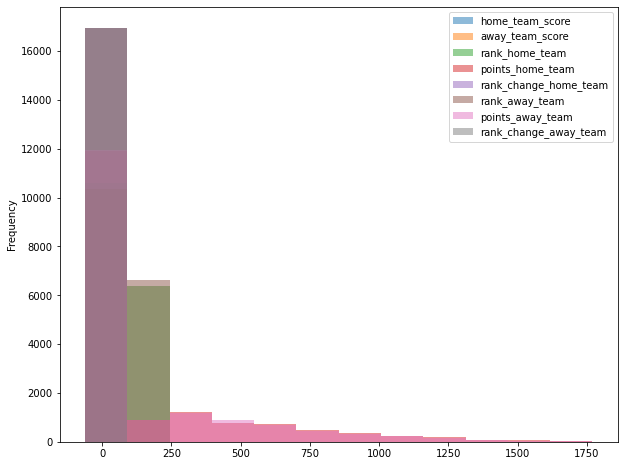

In [49]:
# plotting univariate summaries and recording our observations

final_merge.plot.hist(bins=12, alpha=0.5, figsize=(10,8))

Observations: we see positive skewness in all our numerical variables 

In [50]:
# checking for statistical summary of our dataframe

final_merge.describe()

,home_team_score,away_team_score,rank_home_team,points_home_team,rank_change_home_team,rank_away_team,points_away_team,rank_change_away_team
count,16957.000000,16957.000000,16957.000000,16957.000000,16957.000000,16957.000000,16957.000000,16957.000000
mean,1.602878,1.068290,76.090464,166.101932,0.936663,78.948458,159.520020,0.508345
std,1.614721,1.244543,50.825282,313.385538,6.859232,52.018337,303.061825,6.969350
min,0.000000,0.000000,1.000000,0.000000,-62.000000,1.000000,0.000000,-62.000000
25%,0.000000,0.000000,33.000000,0.000000,-2.000000,35.000000,0.000000,-2.000000
50%,1.000000,1.000000,71.000000,0.000000,0.000000,73.000000,0.000000,0.000000
75%,2.000000,2.000000,112.000000,232.670000,3.000000,115.000000,219.820000,2.000000
max,31.000000,15.000000,209.000000,1770.060000,73.000000,209.000000,1770.060000,92.000000


Observations:

home team score mean = 1.60

away team score mean = 1.06

from this we can conclude that home teams perfom better than away teams. This could be because of the familiar environment and available fans, at stadiums, who cheer them on. 

Mean rank change is about the same for both home and away teams

### Bivariate Analysis

In [51]:
# plotting our bivariate summaries

# sns.pairplot(final_merge)
# plt.show()

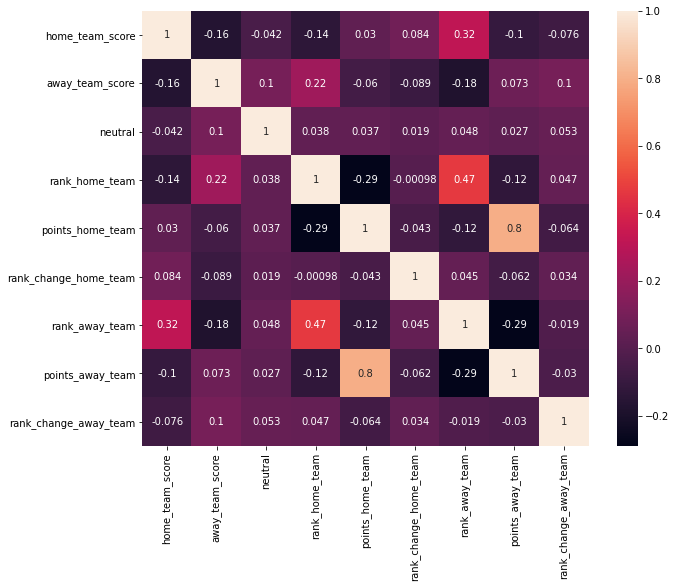

In [52]:
# checking for independence of variables

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(final_merge.corr(), annot=True, ax=ax);

Observations: most of the variables are not correlated to each other, but we have a few that are correlated e.g points away team and points of home team

##  KFold Cross-validation and RMSE computation

In [53]:
# we first need to encode tournament, we will do that using label encoding as shown below

final_merge['tournament'] = final_merge['tournament'].cat.codes
final_merge.head()

,home_team,away_team,home_team_score,away_team_score,tournament,neutral,rank_home_team,points_home_team,rank_change_home_team,rank_away_team,points_away_team,rank_change_away_team,year_month
0,Colombia,Paraguay,0,0,26,False,19,0.0,16,67,0.0,1,1993-08
1,Argentina,Paraguay,0,0,26,False,5,0.0,5,67,0.0,1,1993-08
2,Colombia,Argentina,2,1,26,False,19,0.0,16,5,0.0,5,1993-08
3,Peru,Argentina,0,1,26,False,70,0.0,8,5,0.0,5,1993-08
4,Paraguay,Argentina,1,3,26,False,67,0.0,1,5,0.0,5,1993-08


In [54]:
# splitting data into independent and dependent variables
X = final_merge[['rank_home_team', 'rank_away_team', 'tournament']].values
y = final_merge['home_team_score'].values

# we will use KFold
from sklearn.model_selection import KFold

folds = KFold(n_splits =5)
folds
# creating an array to keep track of RSMEs for our 5 models
RMSES = []
count =1

for train_index, test_index in folds.split(X):
  print('\nTraining model '+ str(count))

  # splitting the data into train and test which is determined by KFold

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fitting our model

  reg = LinearRegression()
  reg.fit(X_train, y_train)

  # acessing the accuracy of the model through prediction and getting the rmses values
  home_team_score_pred = reg.predict(X_test)
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, home_team_score_pred))
  RMSES.append(rmse_value)

  print('Model ' + str(count) + 'Root mean Squared Error: ', rmse_value)
  count = count + 1



Training model 1
Model 1Root mean Squared Error:  1.487488921213846

Training model 2
Model 2Root mean Squared Error:  1.6158826411160525

Training model 3
Model 3Root mean Squared Error:  1.3621079587124352

Training model 4
Model 4Root mean Squared Error:  1.3663151396791902

Training model 5
Model 5Root mean Squared Error:  1.359481725757262


Observations: based on the RMSE values, model 5 would be the best choice among the 5 models 
because it has the smallest value

## Polynomial Regression


In [55]:
# Task 1: predict how many goals the home team scores
# what to train: rank of home team, rank of away team and tournament type

# splitting the data into independent and dependent variables
X = final_merge[['rank_home_team', 'rank_away_team','tournament' ]].values #independent variables
y = final_merge['home_team_score'].values #dependent variable


# splitting the dataframe into train and test, we will 20 % as our test size

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# fitting regression model to the dataframe

poly_reg = PolynomialFeatures(degree=3)
X_poly =poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# accessing the accuracy of the polynomial model
home_team_score_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

# comparing actual with the prediction
comparison = pd.DataFrame({'Actual score': y_test.flatten(), 'Predicted score': home_team_score_pred.flatten()})
comparison


,Actual score,Predicted score
0,0,0.786151
1,1,1.064256
2,1,1.518588
3,1,1.686306
4,5,1.957835
...,...,...
3387,1,0.679076
3388,1,2.125715
3389,0,0.446282
3390,1,1.169489


In [56]:
# Task 2: predict how many goals the away team scores
# what to train: rank of home team, rank of away team and tournament type

# splitting the data into independent and dependent variables
X = final_merge[['rank_away_team', 'rank_home_team','tournament' ]].values #independent variables
y = final_merge['away_team_score'].values #dependent variable


# splitting the dataframe into train and test, we will 20 % as our test size

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# fitting polynomial regression model to the dataframe

poly_reg = PolynomialFeatures(degree=3)
X_poly =poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# using the model to make a prediction
home_team_score_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

# comparing actual with the prediction
comparison = pd.DataFrame({'Actual score': y_test.flatten(), 'Predicted score': home_team_score_pred.flatten()})
comparison

,Actual score,Predicted score
0,2,1.742621
1,1,1.272721
2,1,0.813929
3,0,1.392895
4,0,0.657482
...,...,...
3387,1,2.329158
3388,0,0.569385
3389,1,2.578510
3390,2,1.151997


## Feature Engineering and Logistic Regression

In [57]:
# Task: Figure out the home team's perspective if the game is a win, lose or Draw(W,L,D)
# Here we need to create a new feature that holds W,L,D values

# for a win, home_score_diff > 0
# for a loss, home_score_diff < 0
# for a draw, home_score_diff = 0

final_merge['home_score_diff'] = final_merge['home_team_score'] - final_merge['away_team_score']
final_merge.head()

,home_team,away_team,home_team_score,away_team_score,tournament,neutral,rank_home_team,points_home_team,rank_change_home_team,rank_away_team,points_away_team,rank_change_away_team,year_month,home_score_diff
0,Colombia,Paraguay,0,0,26,False,19,0.0,16,67,0.0,1,1993-08,0
1,Argentina,Paraguay,0,0,26,False,5,0.0,5,67,0.0,1,1993-08,0
2,Colombia,Argentina,2,1,26,False,19,0.0,16,5,0.0,5,1993-08,1
3,Peru,Argentina,0,1,26,False,70,0.0,8,5,0.0,5,1993-08,-1
4,Paraguay,Argentina,1,3,26,False,67,0.0,1,5,0.0,5,1993-08,-2


In [58]:
# checking to see if the added column has the correct datatype
final_merge.dtypes

home_team                 category
away_team                 category
home_team_score              int64
away_team_score              int64
tournament                    int8
neutral                       bool
rank_home_team               int64
points_home_team           float64
rank_change_home_team        int64
rank_away_team               int64
points_away_team           float64
rank_change_away_team        int64
year_month               period[M]
home_score_diff              int64
dtype: object

In [59]:
# splitting data into independent and dependent variables

X = final_merge[['home_team_score', 'away_team_score']]
y = final_merge['home_score_diff']

# splitting data into tran and test, we will use 20% as our test size

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# fitting the model

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# using the model to make predictions

home_score_diff_pred = LogReg.predict(X_test)

# evaluating the model

confusion_matrix = confusion_matrix(y_test, home_score_diff_pred)
confusion_matrix

array([[  0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   6,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,

## Creating residual plots for models and assessing their heteroscedasticity using Bartlett's test

In [66]:
# splitting out dataframe into independent and dependent variables
X = final_merge[['rank_home_team', 'rank_away_team', 'tournament']].values
y = final_merge['home_team_score'].values

# splitting dataframe into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fitting our model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# prediction

y_predict = regressor.predict(X_test)

# creating residual by subtracting the test value from predicted value

residuals = np.subtract(y_predict, y_test)

# getting statistical summary of our residual

print(pd.DataFrame(residuals).describe())

                 0
count  3392.000000
mean     -0.013668
std       1.468684
min     -14.940155
25%      -0.715866
50%       0.199281
75%       0.955941
max       3.303290


Observations: yes we have created a model but our prediction are way off up to 330%(checking the max value). There is no need to do the heteroskedasticity test because it's obvious that our model needs a lot of fine tuning to make it better

##  Checking for Multicollinearity

In [60]:
# first, let's encode the neutral column using label encoding

final_merge['neutral'] = final_merge['neutral'].astype('category')
final_merge['neutral'] = final_merge['neutral'].cat.codes
final_merge.head()

,home_team,away_team,home_team_score,away_team_score,tournament,neutral,rank_home_team,points_home_team,rank_change_home_team,rank_away_team,points_away_team,rank_change_away_team,year_month,home_score_diff
0,Colombia,Paraguay,0,0,26,0,19,0.0,16,67,0.0,1,1993-08,0
1,Argentina,Paraguay,0,0,26,0,5,0.0,5,67,0.0,1,1993-08,0
2,Colombia,Argentina,2,1,26,0,19,0.0,16,5,0.0,5,1993-08,1
3,Peru,Argentina,0,1,26,0,70,0.0,8,5,0.0,5,1993-08,-1
4,Paraguay,Argentina,1,3,26,0,67,0.0,1,5,0.0,5,1993-08,-2


In [61]:
# dropping columns that we wont need to check for multicollineality

final_merge.drop(['home_team', 'away_team','year_month', 'home_score_diff' ], axis=1, inplace = True)

In [62]:
final_merge.head()

,home_team_score,away_team_score,tournament,neutral,rank_home_team,points_home_team,rank_change_home_team,rank_away_team,points_away_team,rank_change_away_team
0,0,0,26,0,19,0.0,16,67,0.0,1
1,0,0,26,0,5,0.0,5,67,0.0,1
2,2,1,26,0,19,0.0,16,5,0.0,5
3,0,1,26,0,70,0.0,8,5,0.0,5
4,1,3,26,0,67,0.0,1,5,0.0,5


In [63]:
# Assuming our dependent variable is home_team_score, we will focus on the other variables as our independent variables
# let's first check for the correlation of the independent variables

correlations = final_merge.iloc[:, 1:10].corr()
correlations

,away_team_score,tournament,neutral,rank_home_team,points_home_team,rank_change_home_team,rank_away_team,points_away_team,rank_change_away_team
away_team_score,1.000000,0.029986,0.099986,0.221319,-0.060497,-0.089402,-0.180431,0.073230,0.100628
tournament,0.029986,1.000000,-0.080757,-0.146859,0.020499,-0.060467,-0.157931,0.025825,-0.020157
neutral,0.099986,-0.080757,1.000000,0.037763,0.036702,0.019000,0.047874,0.027494,0.052987
rank_home_team,0.221319,-0.146859,0.037763,1.000000,-0.289158,-0.000978,0.469478,-0.123647,0.047072
points_home_team,-0.060497,0.020499,0.036702,-0.289158,1.000000,-0.043067,-0.119600,0.796825,-0.063686
rank_change_home_team,-0.089402,-0.060467,0.019000,-0.000978,-0.043067,1.000000,0.044891,-0.061849,0.034294
rank_away_team,-0.180431,-0.157931,0.047874,0.469478,-0.119600,0.044891,1.000000,-0.286291,-0.018607
points_away_team,0.073230,0.025825,0.027494,-0.123647,0.796825,-0.061849,-0.286291,1.000000,-0.029886
rank_change_away_team,0.100628,-0.020157,0.052987,0.047072,-0.063686,0.034294,-0.018607,-0.029886,1.000000


Observations: the above table shows how each variable is correlated to each other

In [64]:
# let's use the correlations to compute the VIF

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns= correlations.columns)

,away_team_score,tournament,neutral,rank_home_team,points_home_team,rank_change_home_team,rank_away_team,points_away_team,rank_change_away_team
away_team_score,1.213019,-0.043521,-0.124361,-0.461679,0.022240,0.090639,0.421455,-0.035504,-0.089530
tournament,-0.043521,1.043694,0.076641,0.117766,0.015572,0.054006,0.100310,0.008849,0.017083
neutral,-0.124361,0.076641,1.026226,0.022971,-0.051808,-0.023297,-0.076739,-0.001732,-0.045379
rank_home_team,-0.461679,0.117766,0.022971,1.820811,1.111546,0.005263,-1.055218,-0.932655,-0.014992
points_home_team,0.022240,0.015572,-0.051808,1.111546,3.616448,0.014349,-0.941856,-3.011484,0.070799
rank_change_home_team,0.090639,0.054006,-0.023297,0.005263,0.014349,1.016753,-0.009460,0.040808,-0.039957
rank_away_team,0.421455,0.100310,-0.076739,-1.055218,-0.941856,-0.009460,1.794752,1.102511,0.020034
points_away_team,-0.035504,0.008849,-0.001732,-0.932655,-3.011484,0.040808,1.102511,3.604373,-0.017211
rank_change_away_team,-0.089530,0.017083,-0.045379,-0.014992,0.070799,-0.039957,0.020034,-0.017211,1.018201


Observations: looking at the VIF results , the VIF results for each variable is found diagonaly. From the table, we see that thta points away team has a VIF of 3.60 and points home team also has a VIF of 3.61. Let's remove points away team and see if the VIF will improve

In [65]:
point_away_team_dropped = correlations.drop(columns=['points_away_team'])
correlations = point_away_team_dropped.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns= correlations.columns)

,away_team_score,tournament,neutral,rank_home_team,points_home_team,rank_change_home_team,rank_away_team,rank_change_away_team
away_team_score,39.967570,56.066176,29.360903,38.909838,79.731067,44.699227,49.673594,34.807375
tournament,56.066176,83.854233,43.804404,60.026747,117.553002,65.635522,70.921845,51.512571
neutral,29.360903,43.804404,23.973401,31.711170,61.887807,34.544014,37.083214,27.100275
rank_home_team,38.909838,60.026747,31.711170,46.808330,85.399092,47.347769,48.301867,37.150249
points_home_team,79.731067,117.553002,61.887807,85.399092,168.015693,93.166065,100.574311,73.215003
rank_change_home_team,44.699227,65.635522,34.544014,47.347769,93.166065,52.910349,56.063606,40.709676
rank_away_team,49.673594,70.921845,37.083214,48.301867,100.574311,56.063606,64.068834,44.109795
rank_change_away_team,34.807375,51.512571,27.100275,37.150249,73.215003,40.709676,44.109795,32.974598


Observations: the resulting values are strange and can not tell us about the change in VIF hence it's hard to tell on multicollineality